# Taxi Data KMeans Clustering: PULocationID and trip_distance

In [11]:
#Perform kmeans clustering of PULocationIDs and trip_distance
#%pylab inline
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from datetime import datetime
from datetime import date
style.use("ggplot")
sns.set()

In [12]:
#create a training data set and a testing data set
traindf = pd.read_csv("new2_yellow_tripdata_2017-09.csv")
testdf = pd.read_csv("new2_yellow_tripdata_2017-09.csv")

#display first 10 rows of training set
traindf.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-09-01 00:17:17,2017-09-01 00:18:49,1,0.40,1,N,161,161,1,3.5,0.5,0.5,0.00,0.0,0.3,4.80
1,1,2017-09-01 00:22:08,2017-09-01 00:25:22,2,0.90,1,N,164,234,1,5.0,0.5,0.5,1.25,0.0,0.3,7.55
2,2,2017-09-01 00:30:43,2017-09-01 00:33:47,1,0.52,1,N,193,193,2,4.0,0.5,0.5,0.00,0.0,0.3,5.30
3,1,2017-09-01 00:37:57,2017-09-01 00:42:24,1,1.50,1,N,246,50,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
4,1,2017-09-01 00:15:56,2017-09-01 00:28:28,1,1.30,1,N,143,143,4,9.5,0.5,0.5,0.00,0.0,0.3,10.80
5,1,2017-09-01 00:58:35,2017-09-01 01:07:09,1,1.50,1,N,50,143,1,8.0,0.5,0.5,2.00,0.0,0.3,11.30
6,1,2017-09-01 00:00:13,2017-09-01 00:07:39,1,1.60,1,N,163,186,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30
7,1,2017-09-01 00:32:30,2017-09-01 00:36:03,1,0.70,1,N,163,162,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30
8,1,2017-09-01 00:45:09,2017-09-01 00:51:06,1,0.90,1,N,161,141,1,6.0,0.5,0.5,1.50,0.0,0.3,8.80
9,2,2017-09-01 00:00:30,2017-09-01 00:33:46,1,6.34,1,N,249,188,1,25.0,0.5,0.5,5.26,0.0,0.3,31.56


In [13]:
x_coord_traindf_array = np.array(traindf['PULocationID'])
print("x_coord_testdf_array = ", x_coord_traindf_array)
y_coord_testdf_array = np.array(testdf['trip_distance'])
print("y_coord_testdf_array = ", y_coord_testdf_array)

x_coord_testdf_array =  [161 164 193 ..., 162 255 158]
y_coord_testdf_array =  [ 0.4   0.9   0.52 ...,  1.08  4.58  0.  ]


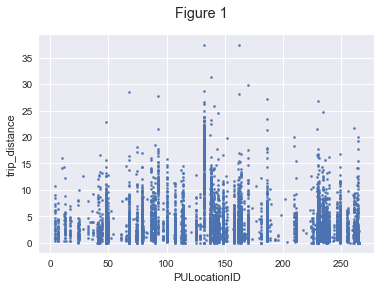

In [14]:
plt.scatter(x_coord_traindf_array, y_coord_testdf_array, s=5)
plt.suptitle('Figure 1')
plt.xlabel('PULocationID')
plt.ylabel('trip_distance')
plt.show()

In [15]:
#Create a 2D array of (PULocationID, trip_distance) points.
#Cluster - unsupervised learning
#XY_array = np.concatenate((x_coord_traindf_array, y_coord_testdf_array))
#display(XY_array)
combined_2D_array = np.vstack((x_coord_traindf_array, y_coord_testdf_array)).T
XY_array = combined_2D_array
display(XY_array)

array([[ 161.  ,    0.4 ],
       [ 164.  ,    0.9 ],
       [ 193.  ,    0.52],
       ..., 
       [ 162.  ,    1.08],
       [ 255.  ,    4.58],
       [ 158.  ,    0.  ]])

centroids:  [[ 239.10264039    2.84551506]
 [ 155.63505103    4.16572318]
 [  47.5275        2.99118333]
 [  95.84416826    3.09508604]]
labels:  [1 1 1 ..., 1 0 1]
coordinate:  [ 161.     0.4] label:  1
coordinate:  [ 164.     0.9] label:  1
coordinate:  [ 193.      0.52] label:  1
coordinate:  [ 246.     1.5] label:  0
coordinate:  [ 143.     1.3] label:  1
coordinate:  [ 50.    1.5] label:  2
coordinate:  [ 163.     1.6] label:  1
coordinate:  [ 163.     0.7] label:  1
coordinate:  [ 161.     0.9] label:  1
coordinate:  [ 249.      6.34] label:  0
coordinate:  [ 114.    2.] label:  3
coordinate:  [ 249.     1.8] label:  0
coordinate:  [ 261.      2.22] label:  0
coordinate:  [ 79.     3.02] label:  3
coordinate:  [ 68.     1.29] label:  2
coordinate:  [ 107.     2.4] label:  3
coordinate:  [ 234.      2.26] label:  0
coordinate:  [ 164.     2.4] label:  1
coordinate:  [ 48.    3.5] label:  2
coordinate:  [ 107.    9.] label:  3
coordinate:  [ 132.     17.63] label:  1
coordinate:  [

coordinate:  [ 256.     3.6] label:  0
coordinate:  [ 148.     3.7] label:  1
coordinate:  [ 161.     3.2] label:  1
coordinate:  [ 238.     8.4] label:  0
coordinate:  [ 249.      2.32] label:  0
coordinate:  [ 113.    1.] label:  3
coordinate:  [ 90.     1.71] label:  3
coordinate:  [ 79.    1.8] label:  3
coordinate:  [ 162.     1.2] label:  1
coordinate:  [ 132.     11.91] label:  1
coordinate:  [ 161.      1.29] label:  1
coordinate:  [ 164.      6.81] label:  1
coordinate:  [ 148.     2.7] label:  1
coordinate:  [ 68.    1.7] label:  2
coordinate:  [ 68.     0.62] label:  2
coordinate:  [ 261.     6.6] label:  0
coordinate:  [ 229.     5.1] label:  0
coordinate:  [ 80.    0.9] label:  3
coordinate:  [ 255.     4.9] label:  0
coordinate:  [ 255.     5.6] label:  0
coordinate:  [ 144.      0.89] label:  1
coordinate:  [ 229.    21.6] label:  0
coordinate:  [ 230.     0.9] label:  0
coordinate:  [ 211.     1.3] label:  0
coordinate:  [ 261.     3.9] label:  0
coordinate:  [ 80.    1

coordinate:  [ 230.     1.7] label:  0
coordinate:  [ 93.   11.6] label:  3
coordinate:  [ 144.     3.4] label:  1
coordinate:  [ 211.      5.21] label:  0
coordinate:  [ 170.      0.57] label:  1
coordinate:  [ 246.     1.1] label:  0
coordinate:  [ 114.     6.7] label:  3
coordinate:  [ 170.    3.] label:  1
coordinate:  [ 143.     17.71] label:  1
coordinate:  [ 249.     2.8] label:  0
coordinate:  [ 100.     6.9] label:  3
coordinate:  [ 229.      3.01] label:  0
coordinate:  [ 211.      2.11] label:  0
coordinate:  [ 186.      3.87] label:  1
coordinate:  [ 68.     6.75] label:  2
coordinate:  [ 88.    4.6] label:  3
coordinate:  [ 50.     7.56] label:  2
coordinate:  [ 90.    1.6] label:  3
coordinate:  [ 132.     1.4] label:  1
coordinate:  [ 132.     20.08] label:  1
coordinate:  [ 236.     3.7] label:  0
coordinate:  [ 79.    3.7] label:  3
coordinate:  [ 186.    4.] label:  1
coordinate:  [ 161.     1.8] label:  1
coordinate:  [ 138.     10.62] label:  1
coordinate:  [ 114.  

coordinate:  [ 239.     5.1] label:  0
coordinate:  [ 88.    1.4] label:  3
coordinate:  [ 13.    7.4] label:  2
coordinate:  [ 138.     10.24] label:  1
coordinate:  [ 230.      1.78] label:  0
coordinate:  [ 230.      3.47] label:  0
coordinate:  [ 229.      0.99] label:  0
coordinate:  [ 229.      0.56] label:  0
coordinate:  [ 158.     1.4] label:  1
coordinate:  [ 234.     1.2] label:  0
coordinate:  [ 114.     0.8] label:  3
coordinate:  [ 211.    5.] label:  0
coordinate:  [ 161.      1.61] label:  1
coordinate:  [ 170.      0.91] label:  1
coordinate:  [ 142.      2.67] label:  1
coordinate:  [ 246.     3.1] label:  0
coordinate:  [ 114.      0.66] label:  3
coordinate:  [ 211.     0.8] label:  0
coordinate:  [ 148.      4.91] label:  1
coordinate:  [ 148.      1.98] label:  1
coordinate:  [ 142.      2.34] label:  1
coordinate:  [ 249.      2.14] label:  0
coordinate:  [ 249.     1.6] label:  0
coordinate:  [ 230.     3.3] label:  0
coordinate:  [ 79.    1.5] label:  3
coordin

coordinate:  [ 79.    1.5] label:  3
coordinate:  [ 164.     5.5] label:  1
coordinate:  [ 234.     4.5] label:  0
coordinate:  [ 239.     0.9] label:  0
coordinate:  [ 237.     6.8] label:  0
coordinate:  [ 229.      0.62] label:  0
coordinate:  [ 229.    3.] label:  0
coordinate:  [ 68.     2.77] label:  2
coordinate:  [ 168.     1.7] label:  1
coordinate:  [ 186.     0.7] label:  1
coordinate:  [ 186.     0.6] label:  1
coordinate:  [ 100.     1.3] label:  3
coordinate:  [ 148.      2.25] label:  1
coordinate:  [ 234.      1.36] label:  0
coordinate:  [ 68.     1.73] label:  2
coordinate:  [ 211.      2.43] label:  0
coordinate:  [ 162.     1.2] label:  1
coordinate:  [ 100.     2.6] label:  3
coordinate:  [ 113.     0.9] label:  3
coordinate:  [ 107.      4.34] label:  3
coordinate:  [ 211.      3.04] label:  0
coordinate:  [ 48.     9.61] label:  2
coordinate:  [ 163.     0.9] label:  1
coordinate:  [ 239.     2.3] label:  0
coordinate:  [ 246.      3.28] label:  0
coordinate:  [ 

coordinate:  [ 68.     1.57] label:  2
coordinate:  [ 162.     1.9] label:  1
coordinate:  [ 263.      2.92] label:  0
coordinate:  [ 132.    21.9] label:  1
coordinate:  [ 48.   1.] label:  2
coordinate:  [ 161.     1.3] label:  1
coordinate:  [ 161.     1.2] label:  1
coordinate:  [ 170.    7.] label:  1
coordinate:  [ 148.     2.5] label:  1
coordinate:  [ 148.      1.84] label:  1
coordinate:  [ 75.     1.06] label:  3
coordinate:  [ 226.      4.22] label:  0
coordinate:  [ 114.    1.] label:  3
coordinate:  [ 249.     0.5] label:  0
coordinate:  [ 114.      1.17] label:  3
coordinate:  [ 234.      1.77] label:  0
coordinate:  [ 162.      1.65] label:  1
coordinate:  [ 170.      1.63] label:  1
coordinate:  [ 230.      1.03] label:  0
coordinate:  [ 249.      0.79] label:  0
coordinate:  [ 17.     1.58] label:  2
coordinate:  [ 226.      6.19] label:  0
coordinate:  [ 237.     0.9] label:  0
coordinate:  [ 237.     2.3] label:  0
coordinate:  [ 237.     1.1] label:  0
coordinate:  

coordinate:  [ 249.      0.99] label:  0
coordinate:  [ 246.      1.55] label:  0
coordinate:  [ 249.      1.31] label:  0
coordinate:  [ 164.      5.28] label:  1
coordinate:  [ 163.      1.51] label:  1
coordinate:  [ 186.     6.2] label:  1
coordinate:  [ 162.     1.7] label:  1
coordinate:  [ 161.     1.9] label:  1
coordinate:  [ 144.      0.86] label:  1
coordinate:  [ 148.      1.05] label:  1
coordinate:  [ 13.    2.9] label:  2
coordinate:  [ 249.     0.6] label:  0
coordinate:  [ 234.      8.57] label:  0
coordinate:  [ 71.     4.54] label:  2
coordinate:  [ 170.     1.4] label:  1
coordinate:  [ 79.     1.62] label:  3
coordinate:  [ 148.      2.44] label:  1
coordinate:  [ 7.    1.39] label:  2
coordinate:  [ 249.      1.45] label:  0
coordinate:  [ 211.     1.8] label:  0
coordinate:  [ 90.     1.89] label:  3
coordinate:  [ 141.    2.] label:  1
coordinate:  [ 141.      1.69] label:  1
coordinate:  [ 263.      0.62] label:  0
coordinate:  [ 100.     2.1] label:  3
coordin

coordinate:  [ 234.    1.] label:  0
coordinate:  [ 186.     1.3] label:  1
coordinate:  [ 88.    1.2] label:  3
coordinate:  [ 231.     1.1] label:  0
coordinate:  [ 142.     1.5] label:  1
coordinate:  [ 162.     8.3] label:  1
coordinate:  [ 79.   2.] label:  3
coordinate:  [ 162.     2.9] label:  1
coordinate:  [ 211.     3.2] label:  0
coordinate:  [ 230.     2.7] label:  0
coordinate:  [ 132.     20.08] label:  1
coordinate:  [ 66.    1.5] label:  2
coordinate:  [ 33.    2.4] label:  2
coordinate:  [ 87.    3.1] label:  3
coordinate:  [ 246.     2.3] label:  0
coordinate:  [ 249.     4.9] label:  0
coordinate:  [ 234.      0.65] label:  0
coordinate:  [ 148.      3.85] label:  1
coordinate:  [ 125.     5.1] label:  3
coordinate:  [ 79.     0.75] label:  3
coordinate:  [ 234.      0.43] label:  0
coordinate:  [ 79.     8.13] label:  3
coordinate:  [ 262.      2.13] label:  0
coordinate:  [ 141.      0.95] label:  1
coordinate:  [ 237.      1.43] label:  0
coordinate:  [ 263.      

coordinate:  [ 239.      0.87] label:  0
coordinate:  [ 230.      9.78] label:  0
coordinate:  [ 264.    0.] label:  0
coordinate:  [ 148.      1.67] label:  1
coordinate:  [ 230.      0.98] label:  0
coordinate:  [ 186.      1.58] label:  1
coordinate:  [ 48.     5.58] label:  2
coordinate:  [ 162.      1.75] label:  1
coordinate:  [ 234.      1.79] label:  0
coordinate:  [ 141.      1.16] label:  1
coordinate:  [ 170.      1.11] label:  1
coordinate:  [ 164.     13.07] label:  1
coordinate:  [ 234.     1.5] label:  0
coordinate:  [ 90.    0.6] label:  3
coordinate:  [ 113.     9.6] label:  3
coordinate:  [ 237.      3.24] label:  0
coordinate:  [ 114.      1.09] label:  3
coordinate:  [ 148.      0.99] label:  1
coordinate:  [ 148.      2.81] label:  1
coordinate:  [ 132.     12.23] label:  1
coordinate:  [ 151.      2.78] label:  1
coordinate:  [ 43.     4.32] label:  2
coordinate:  [ 13.    4.4] label:  2
coordinate:  [ 107.     3.4] label:  3
coordinate:  [ 141.     4.1] label:  1

coordinate:  [ 79.   0.] label:  3
coordinate:  [ 162.      2.16] label:  1
coordinate:  [ 263.      0.41] label:  0
coordinate:  [ 141.      3.53] label:  1
coordinate:  [ 265.    0.] label:  0
coordinate:  [ 163.      1.25] label:  1
coordinate:  [ 148.      0.46] label:  1
coordinate:  [ 148.      1.04] label:  1
coordinate:  [ 234.     1.7] label:  0
coordinate:  [ 234.     3.9] label:  0
coordinate:  [ 161.     2.2] label:  1
coordinate:  [ 161.   15.] label:  1
coordinate:  [ 132.     7.9] label:  1
coordinate:  [ 138.     16.31] label:  1
coordinate:  [ 259.      2.44] label:  0
coordinate:  [ 231.      2.25] label:  0
coordinate:  [ 158.     5.5] label:  1
coordinate:  [ 137.     2.7] label:  1
coordinate:  [ 79.    3.8] label:  3
coordinate:  [ 263.     0.9] label:  0
coordinate:  [ 75.    0.5] label:  3
coordinate:  [ 261.    3.] label:  0
coordinate:  [ 100.     0.8] label:  3
coordinate:  [ 230.     2.9] label:  0
coordinate:  [ 230.     4.9] label:  0
coordinate:  [ 75.   

coordinate:  [ 255.     3.7] label:  0
coordinate:  [ 148.    4.] label:  1
coordinate:  [ 132.    20.5] label:  1
coordinate:  [ 230.      1.09] label:  0
coordinate:  [ 230.     1.5] label:  0
coordinate:  [ 234.      1.81] label:  0
coordinate:  [ 230.      1.57] label:  0
coordinate:  [ 231.      3.23] label:  0
coordinate:  [ 234.      2.42] label:  0
coordinate:  [ 158.      1.93] label:  1
coordinate:  [ 234.      1.19] label:  0
coordinate:  [ 132.     18.07] label:  1
coordinate:  [ 144.      3.15] label:  1
coordinate:  [ 162.     10.28] label:  1
coordinate:  [ 230.     0.7] label:  0
coordinate:  [ 163.     3.2] label:  1
coordinate:  [ 114.     1.1] label:  3
coordinate:  [ 148.     1.7] label:  1
coordinate:  [ 68.     1.35] label:  2
coordinate:  [ 263.     1.9] label:  0
coordinate:  [ 233.     0.6] label:  0
coordinate:  [ 229.     3.4] label:  0
coordinate:  [ 162.      0.27] label:  1
coordinate:  [ 162.     1.1] label:  1
coordinate:  [ 138.     4.7] label:  1
coord

coordinate:  [ 90.    0.9] label:  3
coordinate:  [ 249.      2.77] label:  0
coordinate:  [ 161.      2.26] label:  1
coordinate:  [ 68.     1.51] label:  2
coordinate:  [ 230.     3.3] label:  0
coordinate:  [ 132.    18.1] label:  1
coordinate:  [ 144.      0.27] label:  1
coordinate:  [ 148.      5.66] label:  1
coordinate:  [ 48.     0.44] label:  2
coordinate:  [ 230.      4.05] label:  0
coordinate:  [ 68.    2.6] label:  2
coordinate:  [ 161.      0.69] label:  1
coordinate:  [ 161.      1.16] label:  1
coordinate:  [ 142.      0.83] label:  1
coordinate:  [ 146.     5.1] label:  1
coordinate:  [ 161.      0.77] label:  1
coordinate:  [ 48.     7.56] label:  2
coordinate:  [ 79.    4.9] label:  3
coordinate:  [ 166.      0.61] label:  1
coordinate:  [ 41.     2.31] label:  2
coordinate:  [ 48.    0.5] label:  2
coordinate:  [ 164.     4.4] label:  1
coordinate:  [ 261.    21.7] label:  0
coordinate:  [ 233.     1.7] label:  0
coordinate:  [ 148.     0.3] label:  1
coordinate:  

coordinate:  [ 230.      4.07] label:  0
coordinate:  [ 132.     20.46] label:  1
coordinate:  [ 229.     0.5] label:  0
coordinate:  [ 148.     0.7] label:  1
coordinate:  [ 79.    0.6] label:  3
coordinate:  [ 144.    2.] label:  1
coordinate:  [ 170.     1.4] label:  1
coordinate:  [ 79.    0.6] label:  3
coordinate:  [ 211.      1.75] label:  0
coordinate:  [ 132.     16.69] label:  1
coordinate:  [ 148.      3.91] label:  1
coordinate:  [ 100.      2.33] label:  3
coordinate:  [ 79.     1.52] label:  3
coordinate:  [ 230.     0.9] label:  0
coordinate:  [ 170.     0.7] label:  1
coordinate:  [ 164.     5.5] label:  1
coordinate:  [ 79.     3.53] label:  3
coordinate:  [ 138.      5.34] label:  1
coordinate:  [ 93.    11.28] label:  3
coordinate:  [ 48.    0.7] label:  2
coordinate:  [ 48.    0.6] label:  2
coordinate:  [ 148.    2.] label:  1
coordinate:  [ 238.     4.6] label:  0
coordinate:  [ 162.     2.7] label:  1
coordinate:  [ 158.     2.2] label:  1
coordinate:  [ 90.    1

coordinate:  [ 168.     0.9] label:  1
coordinate:  [ 50.     2.79] label:  2
coordinate:  [ 249.      1.16] label:  0
coordinate:  [ 42.    5.7] label:  2
coordinate:  [ 262.     0.7] label:  0
coordinate:  [ 234.      5.25] label:  0
coordinate:  [ 48.     1.87] label:  2
coordinate:  [ 68.    4.6] label:  2
coordinate:  [ 162.      1.56] label:  1
coordinate:  [ 68.     3.13] label:  2
coordinate:  [ 48.     4.58] label:  2
coordinate:  [ 230.      0.71] label:  0
coordinate:  [ 161.     1.5] label:  1
coordinate:  [ 236.      0.62] label:  0
coordinate:  [ 107.    1.] label:  3
coordinate:  [ 68.    2.4] label:  2
coordinate:  [ 79.    0.9] label:  3
coordinate:  [ 162.     2.5] label:  1
coordinate:  [ 148.     3.5] label:  1
coordinate:  [ 264.     1.2] label:  0
coordinate:  [ 264.      2.01] label:  0
coordinate:  [ 48.     0.83] label:  2
coordinate:  [ 230.      0.61] label:  0
coordinate:  [ 68.     1.38] label:  2
coordinate:  [ 79.   1.] label:  3
coordinate:  [ 79.    3.3

coordinate:  [ 148.     0.8] label:  1
coordinate:  [ 237.      2.01] label:  0
coordinate:  [ 230.      1.51] label:  0
coordinate:  [ 164.      1.19] label:  1
coordinate:  [ 186.      1.76] label:  1
coordinate:  [ 79.     1.54] label:  3
coordinate:  [ 162.     1.1] label:  1
coordinate:  [ 164.     1.2] label:  1
coordinate:  [ 100.     0.5] label:  3
coordinate:  [ 161.     0.9] label:  1
coordinate:  [ 48.    0.6] label:  2
coordinate:  [ 230.     0.7] label:  0
coordinate:  [ 90.    4.8] label:  3
coordinate:  [ 231.     0.3] label:  0
coordinate:  [ 88.    8.5] label:  3
coordinate:  [ 148.     2.1] label:  1
coordinate:  [ 137.     0.7] label:  1
coordinate:  [ 79.    0.7] label:  3
coordinate:  [ 234.      1.99] label:  0
coordinate:  [ 148.      3.34] label:  1
coordinate:  [ 79.    12.08] label:  3
coordinate:  [ 132.    18.3] label:  1
coordinate:  [ 132.     22.31] label:  1
coordinate:  [ 43.     0.91] label:  2
coordinate:  [ 236.      1.65] label:  0
coordinate:  [ 14

coordinate:  [ 239.      0.96] label:  0
coordinate:  [ 4.   2.5] label:  2
coordinate:  [ 256.     2.9] label:  0
coordinate:  [ 79.    0.5] label:  3
coordinate:  [ 132.     21.49] label:  1
coordinate:  [ 230.     9.5] label:  0
coordinate:  [ 228.    1.] label:  0
coordinate:  [ 181.    12.2] label:  1
coordinate:  [ 93.     7.49] label:  3
coordinate:  [ 80.     3.27] label:  3
coordinate:  [ 141.     1.2] label:  1
coordinate:  [ 162.     2.1] label:  1
coordinate:  [ 249.    11.3] label:  0
coordinate:  [ 148.      0.79] label:  1
coordinate:  [ 148.      2.56] label:  1
coordinate:  [ 129.      8.66] label:  1
coordinate:  [ 164.     4.9] label:  1
coordinate:  [ 24.     3.25] label:  2
coordinate:  [ 4.    3.58] label:  2
coordinate:  [ 158.     2.3] label:  1
coordinate:  [ 231.     3.1] label:  0
coordinate:  [ 68.    1.2] label:  2
coordinate:  [ 113.     0.6] label:  3
coordinate:  [ 48.    1.8] label:  2
coordinate:  [ 10.    14.21] label:  2
coordinate:  [ 158.     0.6] 

coordinate:  [ 79.     1.32] label:  3
coordinate:  [ 170.      1.04] label:  1
coordinate:  [ 249.     1.3] label:  0
coordinate:  [ 48.    9.2] label:  2
coordinate:  [ 170.      2.27] label:  1
coordinate:  [ 79.   1.] label:  3
coordinate:  [ 4.   3.7] label:  2
coordinate:  [ 249.     1.1] label:  0
coordinate:  [ 249.     0.9] label:  0
coordinate:  [ 114.     2.7] label:  3
coordinate:  [ 100.      1.65] label:  3
coordinate:  [ 170.      1.79] label:  1
coordinate:  [ 161.      2.39] label:  1
coordinate:  [ 114.    2.] label:  3
coordinate:  [ 79.    0.6] label:  3
coordinate:  [ 79.    0.4] label:  3
coordinate:  [ 114.     4.6] label:  3
coordinate:  [ 186.     1.6] label:  1
coordinate:  [ 234.    5.] label:  0
coordinate:  [ 48.    0.5] label:  2
coordinate:  [ 68.    0.7] label:  2
coordinate:  [ 143.     0.8] label:  1
coordinate:  [ 48.    1.9] label:  2
coordinate:  [ 148.     2.3] label:  1
coordinate:  [ 234.    4.] label:  0
coordinate:  [ 50.     1.59] label:  2
co

coordinate:  [ 246.     0.9] label:  0
coordinate:  [ 68.     4.46] label:  2
coordinate:  [ 48.    2.2] label:  2
coordinate:  [ 249.     1.7] label:  0
coordinate:  [ 229.     3.8] label:  0
coordinate:  [ 132.    15.6] label:  1
coordinate:  [ 163.      1.42] label:  1
coordinate:  [ 144.      4.91] label:  1
coordinate:  [ 132.      2.44] label:  1
coordinate:  [ 132.    18.4] label:  1
coordinate:  [ 237.      1.93] label:  0
coordinate:  [ 161.      1.84] label:  1
coordinate:  [ 93.     7.04] label:  3
coordinate:  [ 93.    11.87] label:  3
coordinate:  [ 141.     6.8] label:  1
coordinate:  [ 255.     3.9] label:  0
coordinate:  [ 107.     1.8] label:  3
coordinate:  [ 79.    4.1] label:  3
coordinate:  [ 79.     2.55] label:  3
coordinate:  [ 249.      5.93] label:  0
coordinate:  [ 93.     3.15] label:  3
coordinate:  [ 93.    13.76] label:  3
coordinate:  [ 113.      1.72] label:  3
coordinate:  [ 87.     3.55] label:  3
coordinate:  [ 114.      5.68] label:  3
coordinate:  

coordinate:  [ 132.     19.34] label:  1
coordinate:  [ 141.      1.01] label:  1
coordinate:  [ 236.      9.52] label:  0
coordinate:  [ 88.     7.83] label:  3
coordinate:  [ 132.     20.71] label:  1
coordinate:  [ 79.    0.9] label:  3
coordinate:  [ 90.    6.1] label:  3
coordinate:  [ 152.     4.3] label:  1
coordinate:  [ 158.     7.1] label:  1
coordinate:  [ 138.   13.] label:  1
coordinate:  [ 13.    4.8] label:  2
coordinate:  [ 148.     4.1] label:  1
coordinate:  [ 68.   8.] label:  2
coordinate:  [ 186.      4.34] label:  1
coordinate:  [ 146.      2.83] label:  1
coordinate:  [ 170.      1.47] label:  1
coordinate:  [ 132.     18.54] label:  1
coordinate:  [ 68.    1.7] label:  2
coordinate:  [ 148.     0.5] label:  1
coordinate:  [ 148.      1.04] label:  1
coordinate:  [ 170.      1.69] label:  1
coordinate:  [ 232.      1.72] label:  0
coordinate:  [ 234.      0.46] label:  0
coordinate:  [ 234.      0.83] label:  0
coordinate:  [ 186.      1.01] label:  1
coordinate:

coordinate:  [ 249.     2.1] label:  0
coordinate:  [ 100.      0.38] label:  3
coordinate:  [ 186.      2.26] label:  1
coordinate:  [ 186.      0.79] label:  1
coordinate:  [ 229.      2.67] label:  0
coordinate:  [ 141.    13.9] label:  1
coordinate:  [ 43.    1.6] label:  2
coordinate:  [ 132.     7.4] label:  1
coordinate:  [ 230.      0.62] label:  0
coordinate:  [ 234.      4.37] label:  0
coordinate:  [ 79.     2.37] label:  3
coordinate:  [ 170.     1.4] label:  1
coordinate:  [ 264.      0.83] label:  0
coordinate:  [ 48.    1.1] label:  2
coordinate:  [ 237.     0.3] label:  0
coordinate:  [ 162.      3.39] label:  1
coordinate:  [ 107.      1.15] label:  3
coordinate:  [ 79.     0.69] label:  3
coordinate:  [ 137.      2.88] label:  1
coordinate:  [ 230.      1.73] label:  0
coordinate:  [ 262.      7.74] label:  0
coordinate:  [ 68.    8.4] label:  2
coordinate:  [ 116.     0.7] label:  3
coordinate:  [ 68.    1.2] label:  2
coordinate:  [ 100.     2.4] label:  3
coordinat

coordinate:  [ 48.   2.] label:  2
coordinate:  [ 229.     0.9] label:  0
coordinate:  [ 211.      3.59] label:  0
coordinate:  [ 148.     2.7] label:  1
coordinate:  [ 256.     3.6] label:  0
coordinate:  [ 138.     14.39] label:  1
coordinate:  [ 162.     1.5] label:  1
coordinate:  [ 79.     3.53] label:  3
coordinate:  [ 255.      6.08] label:  0
coordinate:  [ 79.    1.3] label:  3
coordinate:  [ 114.     0.5] label:  3
coordinate:  [ 113.     1.8] label:  3
coordinate:  [ 145.      8.06] label:  1
coordinate:  [ 231.      2.43] label:  0
coordinate:  [ 237.      1.84] label:  0
coordinate:  [ 231.      4.32] label:  0
coordinate:  [ 234.    1.] label:  0
coordinate:  [ 114.     1.9] label:  3
coordinate:  [ 249.     2.3] label:  0
coordinate:  [ 162.     6.1] label:  1
coordinate:  [ 231.     7.7] label:  0
coordinate:  [ 93.    10.54] label:  3
coordinate:  [ 114.      3.45] label:  3
coordinate:  [ 88.     4.43] label:  3
coordinate:  [ 100.     0.7] label:  3
coordinate:  [ 48

coordinate:  [ 48.     2.46] label:  2
coordinate:  [ 162.      1.64] label:  1
coordinate:  [ 234.      4.86] label:  0
coordinate:  [ 161.      1.01] label:  1
coordinate:  [ 48.     1.68] label:  2
coordinate:  [ 112.     3.9] label:  3
coordinate:  [ 45.    5.4] label:  2
coordinate:  [ 79.     3.09] label:  3
coordinate:  [ 255.      0.86] label:  0
coordinate:  [ 148.      3.22] label:  1
coordinate:  [ 170.      2.23] label:  1
coordinate:  [ 162.      1.77] label:  1
coordinate:  [ 143.      2.56] label:  1
coordinate:  [ 79.    7.3] label:  3
coordinate:  [ 236.     5.7] label:  0
coordinate:  [ 137.     2.9] label:  1
coordinate:  [ 138.     8.2] label:  1
coordinate:  [ 164.    16.7] label:  1
coordinate:  [ 148.      3.06] label:  1
coordinate:  [ 234.    3.] label:  0
coordinate:  [ 68.    2.1] label:  2
coordinate:  [ 148.     1.1] label:  1
coordinate:  [ 164.     2.4] label:  1
coordinate:  [ 88.    2.7] label:  3
coordinate:  [ 170.     1.2] label:  1
coordinate:  [ 13

coordinate:  [ 236.     4.4] label:  0
coordinate:  [ 236.    2.] label:  0
coordinate:  [ 74.    0.9] label:  3
coordinate:  [ 230.     1.2] label:  0
coordinate:  [ 230.      1.99] label:  0
coordinate:  [ 186.      2.06] label:  1
coordinate:  [ 151.      0.86] label:  1
coordinate:  [ 43.     0.59] label:  2
coordinate:  [ 230.      4.14] label:  0
coordinate:  [ 114.      1.34] label:  3
coordinate:  [ 45.     8.07] label:  2
coordinate:  [ 249.    0.] label:  0
coordinate:  [ 249.    0.] label:  0
coordinate:  [ 79.    1.1] label:  3
coordinate:  [ 107.     0.8] label:  3
coordinate:  [ 87.     5.42] label:  3
coordinate:  [ 230.      1.59] label:  0
coordinate:  [ 232.      3.36] label:  0
coordinate:  [ 249.    1.] label:  0
coordinate:  [ 79.    5.7] label:  3
coordinate:  [ 79.    2.8] label:  3
coordinate:  [ 132.    20.6] label:  1
coordinate:  [ 189.      2.25] label:  1
coordinate:  [ 114.      3.18] label:  3
coordinate:  [ 107.      2.95] label:  3
coordinate:  [ 132.  

coordinate:  [ 48.     0.31] label:  2
coordinate:  [ 48.     3.21] label:  2
coordinate:  [ 230.      3.05] label:  0
coordinate:  [ 234.     1.5] label:  0
coordinate:  [ 237.     0.9] label:  0
coordinate:  [ 148.      3.48] label:  1
coordinate:  [ 148.      2.15] label:  1
coordinate:  [ 68.     4.24] label:  2
coordinate:  [ 158.     0.6] label:  1
coordinate:  [ 158.     1.5] label:  1
coordinate:  [ 79.    0.5] label:  3
coordinate:  [ 79.    2.4] label:  3
coordinate:  [ 141.    6.] label:  1
coordinate:  [ 125.     1.5] label:  3
coordinate:  [ 100.     2.1] label:  3
coordinate:  [ 231.      1.02] label:  0
coordinate:  [ 231.      2.58] label:  0
coordinate:  [ 68.     5.79] label:  2
coordinate:  [ 148.     1.6] label:  1
coordinate:  [ 79.   10.6] label:  3
coordinate:  [ 246.      1.81] label:  0
coordinate:  [ 48.     1.07] label:  2
coordinate:  [ 161.      0.53] label:  1
coordinate:  [ 230.      1.38] label:  0
coordinate:  [ 170.      3.44] label:  1
coordinate:  [ 

coordinate:  [ 138.    4.] label:  1
coordinate:  [ 68.   8.] label:  2
coordinate:  [ 129.     3.6] label:  1
coordinate:  [ 68.     1.49] label:  2
coordinate:  [ 68.     0.64] label:  2
coordinate:  [ 162.    2.] label:  1
coordinate:  [ 162.     0.5] label:  1
coordinate:  [ 48.     3.87] label:  2
coordinate:  [ 230.     1.8] label:  0
coordinate:  [ 230.     2.1] label:  0
coordinate:  [ 107.     1.3] label:  3
coordinate:  [ 158.     1.2] label:  1
coordinate:  [ 264.    15.4] label:  0
coordinate:  [ 138.     9.4] label:  1
coordinate:  [ 137.     2.5] label:  1
coordinate:  [ 256.      9.83] label:  0
coordinate:  [ 231.      6.98] label:  0
coordinate:  [ 113.      1.33] label:  3
coordinate:  [ 107.      0.86] label:  3
coordinate:  [ 79.    0.7] label:  3
coordinate:  [ 79.     0.69] label:  3
coordinate:  [ 170.     0.7] label:  1
coordinate:  [ 162.      4.66] label:  1
coordinate:  [ 144.     5.8] label:  1
coordinate:  [ 79.     2.99] label:  3
coordinate:  [ 145.      

coordinate:  [ 107.      1.18] label:  3
coordinate:  [ 162.      2.76] label:  1
coordinate:  [ 233.      1.81] label:  0
coordinate:  [ 132.     19.11] label:  1
coordinate:  [ 230.     1.5] label:  0
coordinate:  [ 236.     0.3] label:  0
coordinate:  [ 234.      2.23] label:  0
coordinate:  [ 148.      1.57] label:  1
coordinate:  [ 68.     1.74] label:  2
coordinate:  [ 87.     5.55] label:  3
coordinate:  [ 68.     1.76] label:  2
coordinate:  [ 161.      2.14] label:  1
coordinate:  [ 186.      0.94] label:  1
coordinate:  [ 145.     6.1] label:  1
coordinate:  [ 132.      9.44] label:  1
coordinate:  [ 132.    20.9] label:  1
coordinate:  [ 107.     1.2] label:  3
coordinate:  [ 161.     1.4] label:  1
coordinate:  [ 225.      4.77] label:  0
coordinate:  [ 100.     2.3] label:  3
coordinate:  [ 230.     0.8] label:  0
coordinate:  [ 230.     0.6] label:  0
coordinate:  [ 163.     2.2] label:  1
coordinate:  [ 132.    19.6] label:  1
coordinate:  [ 48.     4.57] label:  2
coord

coordinate:  [ 234.      1.39] label:  0
coordinate:  [ 163.      9.75] label:  1
coordinate:  [ 164.     3.6] label:  1
coordinate:  [ 211.     0.6] label:  0
coordinate:  [ 79.    4.6] label:  3
coordinate:  [ 107.      1.44] label:  3
coordinate:  [ 246.      3.11] label:  0
coordinate:  [ 114.      5.94] label:  3
coordinate:  [ 68.     1.27] label:  2
coordinate:  [ 68.     4.39] label:  2
coordinate:  [ 148.      1.51] label:  1
coordinate:  [ 141.      1.51] label:  1
coordinate:  [ 231.     1.2] label:  0
coordinate:  [ 164.      5.13] label:  1
coordinate:  [ 132.      3.04] label:  1
coordinate:  [ 234.      5.21] label:  0
coordinate:  [ 114.      2.42] label:  3
coordinate:  [ 170.      3.19] label:  1
coordinate:  [ 158.     0.5] label:  1
coordinate:  [ 68.    2.1] label:  2
coordinate:  [ 68.    0.7] label:  2
coordinate:  [ 125.     3.9] label:  3
coordinate:  [ 43.    2.1] label:  2
coordinate:  [ 140.     7.8] label:  1
coordinate:  [ 87.    4.7] label:  3
coordinate:

coordinate:  [ 249.      3.97] label:  0
coordinate:  [ 161.      1.71] label:  1
coordinate:  [ 162.      2.14] label:  1
coordinate:  [ 79.     3.47] label:  3
coordinate:  [ 114.      4.89] label:  3
coordinate:  [ 263.      7.16] label:  0
coordinate:  [ 79.    1.3] label:  3
coordinate:  [ 48.    11.21] label:  2
coordinate:  [ 181.      1.65] label:  1
coordinate:  [ 230.      1.58] label:  0
coordinate:  [ 107.    1.] label:  3
coordinate:  [ 170.      1.73] label:  1
coordinate:  [ 249.      8.43] label:  0
coordinate:  [ 237.      3.74] label:  0
coordinate:  [ 79.     1.69] label:  3
coordinate:  [ 162.      1.23] label:  1
coordinate:  [ 48.     0.52] label:  2
coordinate:  [ 229.      1.34] label:  0
coordinate:  [ 107.      1.68] label:  3
coordinate:  [ 162.     6.3] label:  1
coordinate:  [ 113.     6.4] label:  3
coordinate:  [ 186.      1.67] label:  1
coordinate:  [ 186.     10.71] label:  1
coordinate:  [ 140.      3.85] label:  1
coordinate:  [ 166.      2.58] label

coordinate:  [ 114.      0.65] label:  3
coordinate:  [ 144.      4.48] label:  1
coordinate:  [ 264.    17.7] label:  0
coordinate:  [ 264.     6.6] label:  0
coordinate:  [ 107.     4.4] label:  3
coordinate:  [ 75.   0.] label:  3
coordinate:  [ 234.      7.13] label:  0
coordinate:  [ 132.    19.7] label:  1
coordinate:  [ 93.    10.14] label:  3
coordinate:  [ 148.      1.79] label:  1
coordinate:  [ 88.    5.5] label:  3
coordinate:  [ 234.     0.6] label:  0
coordinate:  [ 107.     9.5] label:  3
coordinate:  [ 163.     2.2] label:  1
coordinate:  [ 239.      2.31] label:  0
coordinate:  [ 239.      0.96] label:  0
coordinate:  [ 249.      4.82] label:  0
coordinate:  [ 24.    1.7] label:  2
coordinate:  [ 132.    19.6] label:  1
coordinate:  [ 260.    0.] label:  0
coordinate:  [ 114.     1.8] label:  3
coordinate:  [ 137.     2.6] label:  1
coordinate:  [ 90.    0.7] label:  3
coordinate:  [ 249.      1.33] label:  0
coordinate:  [ 148.      3.57] label:  1
coordinate:  [ 87. 

coordinate:  [ 148.     2.6] label:  1
coordinate:  [ 158.     3.6] label:  1
coordinate:  [ 163.      4.32] label:  1
coordinate:  [ 148.      0.58] label:  1
coordinate:  [ 148.      0.47] label:  1
coordinate:  [ 50.    9.6] label:  2
coordinate:  [ 148.      4.57] label:  1
coordinate:  [ 113.      1.07] label:  3
coordinate:  [ 107.      1.11] label:  3
coordinate:  [ 100.      3.99] label:  3
coordinate:  [ 161.      3.98] label:  1
coordinate:  [ 164.      3.65] label:  1
coordinate:  [ 148.      2.42] label:  1
coordinate:  [ 234.     12.03] label:  0
coordinate:  [ 138.   10.] label:  1
coordinate:  [ 231.     2.2] label:  0
coordinate:  [ 186.      1.99] label:  1
coordinate:  [ 224.     10.13] label:  0
coordinate:  [ 80.    1.1] label:  3
coordinate:  [ 162.      1.65] label:  1
coordinate:  [ 162.      1.28] label:  1
coordinate:  [ 141.      2.84] label:  1
coordinate:  [ 100.      2.37] label:  3
coordinate:  [ 249.      0.93] label:  0
coordinate:  [ 234.      4.78] lab

coordinate:  [ 37.     1.82] label:  2
coordinate:  [ 234.     0.8] label:  0
coordinate:  [ 186.     1.9] label:  1
coordinate:  [ 79.    1.4] label:  3
coordinate:  [ 232.     1.6] label:  0
coordinate:  [ 114.     0.7] label:  3
coordinate:  [ 142.     0.9] label:  1
coordinate:  [ 48.    3.6] label:  2
coordinate:  [ 148.     6.1] label:  1
coordinate:  [ 79.    0.4] label:  3
coordinate:  [ 114.     2.5] label:  3
coordinate:  [ 164.      5.16] label:  1
coordinate:  [ 255.     1.1] label:  0
coordinate:  [ 249.     0.5] label:  0
coordinate:  [ 234.     2.6] label:  0
coordinate:  [ 142.     2.4] label:  1
coordinate:  [ 249.      1.16] label:  0
coordinate:  [ 144.      1.07] label:  1
coordinate:  [ 246.     4.9] label:  0
coordinate:  [ 263.    5.] label:  0
coordinate:  [ 41.    0.6] label:  2
coordinate:  [ 263.     8.4] label:  0
coordinate:  [ 87.     1.95] label:  3
coordinate:  [ 148.      0.62] label:  1
coordinate:  [ 152.      1.43] label:  1
coordinate:  [ 41.     0.

coordinate:  [ 230.      0.35] label:  0
coordinate:  [ 148.      0.51] label:  1
coordinate:  [ 163.     10.81] label:  1
coordinate:  [ 137.     2.1] label:  1
coordinate:  [ 162.     7.5] label:  1
coordinate:  [ 211.    15.4] label:  0
coordinate:  [ 132.     18.63] label:  1
coordinate:  [ 263.      6.34] label:  0
coordinate:  [ 83.     8.25] label:  3
coordinate:  [ 137.     4.5] label:  1
coordinate:  [ 186.     3.3] label:  1
coordinate:  [ 148.     2.9] label:  1
coordinate:  [ 186.     4.6] label:  1
coordinate:  [ 263.      3.15] label:  0
coordinate:  [ 113.    1.] label:  3
coordinate:  [ 68.     2.87] label:  2
coordinate:  [ 161.      4.41] label:  1
coordinate:  [ 148.      5.71] label:  1
coordinate:  [ 112.      5.17] label:  3
coordinate:  [ 164.      0.87] label:  1
coordinate:  [ 186.      1.58] label:  1
coordinate:  [ 114.      3.16] label:  3
coordinate:  [ 114.     0.8] label:  3
coordinate:  [ 164.     1.9] label:  1
coordinate:  [ 249.      3.87] label:  0
c

coordinate:  [ 158.     2.9] label:  1
coordinate:  [ 236.     4.3] label:  0
coordinate:  [ 100.      1.23] label:  3
coordinate:  [ 158.     7.2] label:  1
coordinate:  [ 163.     1.7] label:  1
coordinate:  [ 113.      1.04] label:  3
coordinate:  [ 148.      1.03] label:  1
coordinate:  [ 114.      4.49] label:  3
coordinate:  [ 148.     0.4] label:  1
coordinate:  [ 170.     1.1] label:  1
coordinate:  [ 114.     1.1] label:  3
coordinate:  [ 138.     11.36] label:  1
coordinate:  [ 230.      4.53] label:  0
coordinate:  [ 43.     2.04] label:  2
coordinate:  [ 234.      2.24] label:  0
coordinate:  [ 232.      7.18] label:  0
coordinate:  [ 181.    1.] label:  1
coordinate:  [ 49.    0.2] label:  2
coordinate:  [ 97.    4.1] label:  3
coordinate:  [ 132.      0.93] label:  1
coordinate:  [ 132.      6.49] label:  1
coordinate:  [ 48.    2.3] label:  2
coordinate:  [ 158.     2.5] label:  1
coordinate:  [ 148.     1.8] label:  1
coordinate:  [ 137.     1.9] label:  1
coordinate:  

coordinate:  [ 114.      0.86] label:  3
coordinate:  [ 114.      3.36] label:  3
coordinate:  [ 138.     7.1] label:  1
coordinate:  [ 145.     6.3] label:  1
coordinate:  [ 33.    0.9] label:  2
coordinate:  [ 148.      2.12] label:  1
coordinate:  [ 90.     4.42] label:  3
coordinate:  [ 143.      0.58] label:  1
coordinate:  [ 24.    1.2] label:  2
coordinate:  [ 43.    0.5] label:  2
coordinate:  [ 230.      0.72] label:  0
coordinate:  [ 48.     1.33] label:  2
coordinate:  [ 158.     1.4] label:  1
coordinate:  [ 79.    1.2] label:  3
coordinate:  [ 79.    2.2] label:  3
coordinate:  [ 79.    3.1] label:  3
coordinate:  [ 79.    3.5] label:  3
coordinate:  [ 163.     3.3] label:  1
coordinate:  [ 68.     3.68] label:  2
coordinate:  [ 238.    0.] label:  0
coordinate:  [ 186.      2.02] label:  1
coordinate:  [ 79.     0.86] label:  3
coordinate:  [ 114.     1.8] label:  3
coordinate:  [ 148.    4.] label:  1
coordinate:  [ 230.     3.5] label:  0
coordinate:  [ 211.     2.6] la

coordinate:  [ 132.     17.72] label:  1
coordinate:  [ 186.     3.2] label:  1
coordinate:  [ 141.     1.5] label:  1
coordinate:  [ 233.     1.7] label:  0
coordinate:  [ 50.    1.5] label:  2
coordinate:  [ 90.     1.34] label:  3
coordinate:  [ 249.      8.56] label:  0
coordinate:  [ 230.      4.22] label:  0
coordinate:  [ 231.      7.81] label:  0
coordinate:  [ 226.     0.9] label:  0
coordinate:  [ 100.     10.35] label:  3
coordinate:  [ 203.      0.23] label:  0
coordinate:  [ 234.      2.28] label:  0
coordinate:  [ 163.    11.2] label:  1
coordinate:  [ 132.      9.88] label:  1
coordinate:  [ 132.     18.64] label:  1
coordinate:  [ 234.      2.32] label:  0
coordinate:  [ 230.      1.12] label:  0
coordinate:  [ 142.     0.3] label:  1
coordinate:  [ 161.     3.6] label:  1
coordinate:  [ 163.    1.] label:  1
coordinate:  [ 161.     1.4] label:  1
coordinate:  [ 249.     1.4] label:  0
coordinate:  [ 231.     13.83] label:  0
coordinate:  [ 148.      3.51] label:  1
coo

coordinate:  [ 264.      1.18] label:  0
coordinate:  [ 114.      2.72] label:  3
coordinate:  [ 230.      4.92] label:  0
coordinate:  [ 79.    3.1] label:  3
coordinate:  [ 234.     1.2] label:  0
coordinate:  [ 148.      0.49] label:  1
coordinate:  [ 148.      1.29] label:  1
coordinate:  [ 234.      1.29] label:  0
coordinate:  [ 249.      0.88] label:  0
coordinate:  [ 90.     0.69] label:  3
coordinate:  [ 231.      8.71] label:  0
coordinate:  [ 132.      9.77] label:  1
coordinate:  [ 90.    1.7] label:  3
coordinate:  [ 239.      1.78] label:  0
coordinate:  [ 263.     0.9] label:  0
coordinate:  [ 132.     12.31] label:  1
coordinate:  [ 37.     2.15] label:  2
coordinate:  [ 17.     1.58] label:  2
coordinate:  [ 170.     5.1] label:  1
coordinate:  [ 48.    0.5] label:  2
coordinate:  [ 132.      6.89] label:  1
coordinate:  [ 144.      4.34] label:  1
coordinate:  [ 230.      3.22] label:  0
coordinate:  [ 114.      1.03] label:  3
coordinate:  [ 138.      4.57] label:  1

coordinate:  [ 170.    6.] label:  1
coordinate:  [ 141.      0.66] label:  1
coordinate:  [ 230.      5.33] label:  0
coordinate:  [ 161.    1.] label:  1
coordinate:  [ 163.      2.86] label:  1
coordinate:  [ 43.     1.35] label:  2
coordinate:  [ 113.      0.91] label:  3
coordinate:  [ 79.     1.23] label:  3
coordinate:  [ 189.      0.84] label:  1
coordinate:  [ 181.     1.7] label:  1
coordinate:  [ 97.    1.2] label:  3
coordinate:  [ 49.    5.7] label:  2
coordinate:  [ 237.     0.9] label:  0
coordinate:  [ 239.     4.3] label:  0
coordinate:  [ 158.    2.] label:  1
coordinate:  [ 137.     6.6] label:  1
coordinate:  [ 48.     0.75] label:  2
coordinate:  [ 100.      1.03] label:  3
coordinate:  [ 246.      0.79] label:  0
coordinate:  [ 132.    12.7] label:  1
coordinate:  [ 230.      6.69] label:  0
coordinate:  [ 25.     0.72] label:  2
coordinate:  [ 114.      6.12] label:  3
coordinate:  [ 79.     1.32] label:  3
coordinate:  [ 144.      4.49] label:  1
coordinate:  [ 

coordinate:  [ 229.     2.9] label:  0
coordinate:  [ 163.     1.2] label:  1
coordinate:  [ 237.    3.] label:  0
coordinate:  [ 114.     3.4] label:  3
coordinate:  [ 170.      1.01] label:  1
coordinate:  [ 79.    0.6] label:  3
coordinate:  [ 132.     18.93] label:  1
coordinate:  [ 33.     3.15] label:  2
coordinate:  [ 138.      9.85] label:  1
coordinate:  [ 100.      9.86] label:  3
coordinate:  [ 239.      1.21] label:  0
coordinate:  [ 237.      1.95] label:  0
coordinate:  [ 143.      0.28] label:  1
coordinate:  [ 68.     2.67] label:  2
coordinate:  [ 25.     0.98] label:  2
coordinate:  [ 25.     3.37] label:  2
coordinate:  [ 132.    17.9] label:  1
coordinate:  [ 132.     19.13] label:  1
coordinate:  [ 161.      3.82] label:  1
coordinate:  [ 148.      6.26] label:  1
coordinate:  [ 49.     1.57] label:  2
coordinate:  [ 140.     2.7] label:  1
coordinate:  [ 100.     4.9] label:  3
coordinate:  [ 209.     0.6] label:  0
coordinate:  [ 48.     7.79] label:  2
coordinat

coordinate:  [ 249.      2.92] label:  0
coordinate:  [ 239.     1.3] label:  0
coordinate:  [ 163.      2.47] label:  1
coordinate:  [ 237.      1.42] label:  0
coordinate:  [ 161.      2.39] label:  1
coordinate:  [ 75.    4.8] label:  3
coordinate:  [ 170.      3.86] label:  1
coordinate:  [ 255.      0.56] label:  0
coordinate:  [ 232.      2.92] label:  0
coordinate:  [ 231.      2.33] label:  0
coordinate:  [ 138.      7.61] label:  1
coordinate:  [ 148.      2.92] label:  1
coordinate:  [ 114.      4.12] label:  3
coordinate:  [ 163.      2.81] label:  1
coordinate:  [ 144.     2.5] label:  1
coordinate:  [ 148.    1.] label:  1
coordinate:  [ 79.    3.1] label:  3
coordinate:  [ 48.     1.89] label:  2
coordinate:  [ 107.      1.21] label:  3
coordinate:  [ 138.      3.29] label:  1
coordinate:  [ 144.      2.41] label:  1
coordinate:  [ 186.      0.89] label:  1
coordinate:  [ 261.      5.75] label:  0
coordinate:  [ 79.     0.61] label:  3
coordinate:  [ 79.     1.36] label: 

coordinate:  [ 148.     7.3] label:  1
coordinate:  [ 141.      5.34] label:  1
coordinate:  [ 158.      2.58] label:  1
coordinate:  [ 211.      5.66] label:  0
coordinate:  [ 170.      1.67] label:  1
coordinate:  [ 232.      1.23] label:  0
coordinate:  [ 148.     1.3] label:  1
coordinate:  [ 151.      1.98] label:  1
coordinate:  [ 237.      0.49] label:  0
coordinate:  [ 237.      1.19] label:  0
coordinate:  [ 132.     17.02] label:  1
coordinate:  [ 170.      4.97] label:  1
coordinate:  [ 48.     1.37] label:  2
coordinate:  [ 50.     6.43] label:  2
coordinate:  [ 41.   3.] label:  2
coordinate:  [ 100.     0.5] label:  3
coordinate:  [ 246.     1.1] label:  0
coordinate:  [ 234.     1.1] label:  0
coordinate:  [ 79.    3.9] label:  3
coordinate:  [ 113.    1.] label:  3
coordinate:  [ 158.     1.8] label:  1
coordinate:  [ 170.      0.81] label:  1
coordinate:  [ 137.      5.19] label:  1
coordinate:  [ 186.      0.94] label:  1
coordinate:  [ 249.      2.12] label:  0
coord

coordinate:  [ 186.      2.97] label:  1
coordinate:  [ 114.     0.9] label:  3
coordinate:  [ 181.    3.] label:  1
coordinate:  [ 97.    2.9] label:  3
coordinate:  [ 148.     2.1] label:  1
coordinate:  [ 186.      3.85] label:  1
coordinate:  [ 231.     2.2] label:  0
coordinate:  [ 162.     2.5] label:  1
coordinate:  [ 230.     3.7] label:  0
coordinate:  [ 100.      2.76] label:  3
coordinate:  [ 158.      1.85] label:  1
coordinate:  [ 186.    17.1] label:  1
coordinate:  [ 186.      3.31] label:  1
coordinate:  [ 107.     4.9] label:  3
coordinate:  [ 148.     8.4] label:  1
coordinate:  [ 186.      1.36] label:  1
coordinate:  [ 79.     1.54] label:  3
coordinate:  [ 148.      2.65] label:  1
coordinate:  [ 140.      4.28] label:  1
coordinate:  [ 41.     0.49] label:  2
coordinate:  [ 48.     1.33] label:  2
coordinate:  [ 79.     4.82] label:  3
coordinate:  [ 148.      1.58] label:  1
coordinate:  [ 114.      1.09] label:  3
coordinate:  [ 249.      4.88] label:  0
coordin

coordinate:  [ 144.      3.42] label:  1
coordinate:  [ 80.     1.39] label:  3
coordinate:  [ 255.      5.58] label:  0
coordinate:  [ 137.      0.99] label:  1
coordinate:  [ 114.      3.57] label:  3
coordinate:  [ 230.      8.14] label:  0
coordinate:  [ 132.    26.3] label:  1
coordinate:  [ 138.     8.2] label:  1
coordinate:  [ 148.     1.4] label:  1
coordinate:  [ 50.     0.74] label:  2
coordinate:  [ 186.      3.99] label:  1
coordinate:  [ 262.      2.07] label:  0
coordinate:  [ 79.     0.92] label:  3
coordinate:  [ 162.      1.72] label:  1
coordinate:  [ 113.      0.78] label:  3
coordinate:  [ 114.     0.8] label:  3
coordinate:  [ 211.     1.7] label:  0
coordinate:  [ 158.     1.1] label:  1
coordinate:  [ 68.     1.62] label:  2
coordinate:  [ 230.      1.48] label:  0
coordinate:  [ 132.    18.4] label:  1
coordinate:  [ 162.     0.6] label:  1
coordinate:  [ 100.     0.7] label:  3
coordinate:  [ 162.     1.5] label:  1
coordinate:  [ 114.     3.9] label:  3
coord

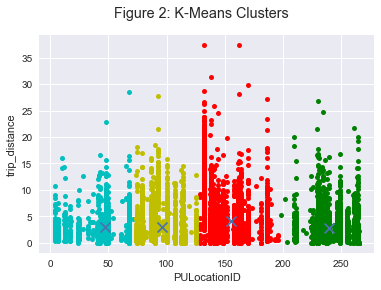

In [17]:
#Flat clustering - perform on 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(XY_array)

#Specify centroids:  cluster based on degrees of variance
centroids = kmeans.cluster_centers_
#Create labels for k-means clustering
labels = kmeans.labels_

print("centroids: ", centroids)
print("labels: ", labels)

colors = ["g.", "r.", "c.", "y."]

for i in range(len(XY_array)):
    print("coordinate: ", XY_array[i], "label: ", labels[i])
    #loop through XY_array by first index (array 1) and each item of the pair within array 1.    
    plt.plot(XY_array[i][0], XY_array[i][1], colors[labels[i]], markersize=10)

#access first and second elements within inner array
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, linewidths=5, zorder=10)
plt.suptitle('Figure 2: K-Means Clusters')
plt.xlabel('PULocationID')
plt.ylabel('trip_distance')
plt.show()

# Taxi Data KMeans Clustering: DOLocationID and trip_distance

In [20]:
x_coord_traindf_array_DO = np.array(traindf['DOLocationID'])
print("x_coord_testdf_array = ", x_coord_traindf_array)
y_coord_testdf_array_DO = np.array(testdf['trip_distance'])
print("y_coord_testdf_array = ", y_coord_testdf_array)

x_coord_testdf_array =  [161 234 193 ..., 137 181 158]
y_coord_testdf_array =  [ 0.4   0.9   0.52 ...,  1.08  4.58  0.  ]


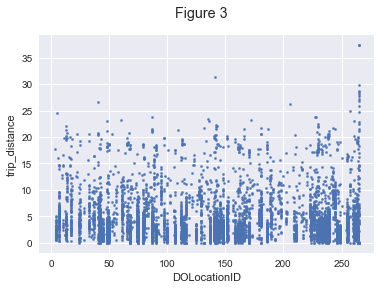

In [21]:
plt.scatter(x_coord_traindf_array_DO, y_coord_testdf_array_DO, s=5)
plt.suptitle('Figure 3')
plt.xlabel('DOLocationID')
plt.ylabel('trip_distance')
plt.show()

In [24]:
#Create a 2D array of (DOLocationID, trip_distance) points.
#Cluster - unsupervised learning
combined_2D_array_DO = np.vstack((x_coord_traindf_array_DO, y_coord_testdf_array_DO)).T
XY_array_DO = combined_2D_array_DO
display(XY_array_DO)

array([[ 161.  ,    0.4 ],
       [ 234.  ,    0.9 ],
       [ 193.  ,    0.52],
       ..., 
       [ 137.  ,    1.08],
       [ 181.  ,    4.58],
       [ 158.  ,    0.  ]])

centroids:  [[ 240.22120253    3.52943354]
 [  89.69466317    3.17565179]
 [ 157.10061869    3.15865516]
 [  37.05874409    4.2787711 ]]
labels:  [2 0 2 ..., 2 2 2]


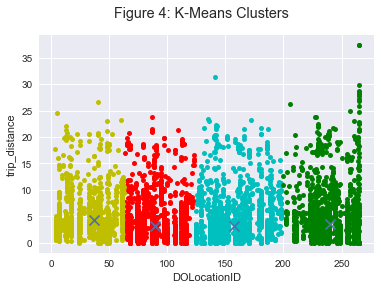

In [26]:
#Cluster w/ kmeans for DOLocationID and trip distance
#Flat clustering - perform on 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(XY_array_DO)

#Specify centroids:  cluster based on degrees of variance
centroids = kmeans.cluster_centers_
#Create labels for k-means clustering
labels = kmeans.labels_

print("centroids: ", centroids)
print("labels: ", labels)

colors = ["g.", "r.", "c.", "y."]

for i in range(len(XY_array_DO)):
    #print("coordinate: ", XY_array_DO[i], "label: ", labels[i])
    #loop through XY_array by first index (array 1) and each item of the pair within array 1.    
    plt.plot(XY_array_DO[i][0], XY_array_DO[i][1], colors[labels[i]], markersize=10)

#access first and second elements within inner array
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, linewidths=5, zorder=10)
plt.suptitle('Figure 4: K-Means Clusters')
plt.xlabel('DOLocationID')
plt.ylabel('trip_distance')
plt.show()

In [24]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 17 columns):
VendorID                 8 non-null int64
tpep_pickup_datetime     8 non-null object
tpep_dropoff_datetime    8 non-null object
passenger_count          8 non-null int64
trip_distance            8 non-null float64
RatecodeID               8 non-null int64
store_and_fwd_flag       8 non-null object
PULocationID             8 non-null int64
DOLocationID             8 non-null int64
payment_type             8 non-null int64
fare_amount              8 non-null float64
extra                    8 non-null float64
mta_tax                  8 non-null float64
tip_amount               8 non-null float64
tolls_amount             8 non-null int64
improvement_surcharge    8 non-null float64
total_amount             8 non-null float64
dtypes: float64(7), int64(7), object(3)
memory usage: 1.1+ KB
